<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/SVM%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('models.csv')
#url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/master/youtube%20spam%20classifier/model.csv'
#df = pd.read_csv(url)


In [3]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,0,0.179708,0.239557,1.866549,0.0000,1,3.850148,0.0,0,16.056023,0.111111,0,0,0,0.0,0
1,1,0.150545,0.184270,1.866549,0.0000,2,4.077537,2.0,0,37.516381,0.000000,0,0,0,0.0,0
2,2,0.167696,0.191896,2.260334,0.0625,3,4.499810,4.0,0,37.516381,0.125000,1,1,0,0.0,1
3,3,0.228679,0.217009,1.683387,0.0000,1,3.610918,0.0,0,37.516381,0.000000,0,0,0,0.0,0
4,4,0.105110,0.125598,2.122198,0.0000,2,4.369448,4.0,1,37.516381,0.076923,1,1,0,0.0,1


In [4]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'post_coment_gap',
       'black_word_count', 'is_link', 'is_youtube_link', 'is_number',
       'comment_duplication', 'is_spam'],
      dtype='object')

### Standardization

In [5]:
dfc = df.copy()

In [6]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Handle imbalance dataset

In [8]:
dfc['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

In [9]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_os,y_os=os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

X = X_os
y = y_os

C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 6255, 1: 712})
The number of classes after fit Counter({0: 6186, 1: 6186})


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Hyperparameter Tuninng

In [12]:
from sklearn import svm

In [13]:
sv =svm.SVC()

In [14]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
grid = {
    'kernel':['rbf'],
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    #'shrinking':[True,False],
    'probability':[True],
   # 'decision_function_shape':['ovo', 'ovr'],
    #'class_weight':[None,'balanced','dict']
    
    
}

In [16]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True) 

In [17]:
from sklearn.model_selection import RandomizedSearchCV
sv_random = RandomizedSearchCV(estimator=sv, param_distributions=grid, n_jobs=-1,n_iter = 100, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [18]:
sv_random.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf'],
                                        'probability': [True]},
                   return_train_score=True, scoring='accuracy', verbose=2)

### Evaluvate

In [19]:
best_model = sv_random.best_estimator_

In [20]:
sv_random.best_params_

{'probability': True, 'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [21]:
sv_random.best_score_

0.9498845265588916

In [22]:
y_pred = best_model.predict(X_test)

In [23]:
err = (y_pred - y_test)

<AxesSubplot:>

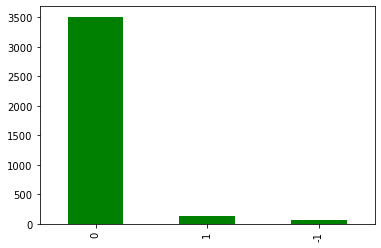

In [24]:
err.value_counts().plot(kind='bar',color='green')

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.05441810344827586
MSE: 0.05441810344827586
RMSE: 0.23327688151266912


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1803  133]
 [  69 1707]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1936
           1       0.93      0.96      0.94      1776

    accuracy                           0.95      3712
   macro avg       0.95      0.95      0.95      3712
weighted avg       0.95      0.95      0.95      3712



In [27]:
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

### ROC

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

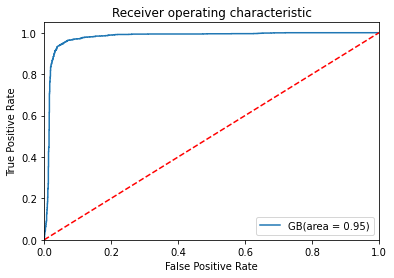

In [30]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Recall - presicion with threshold values

(0.0, 1.0)

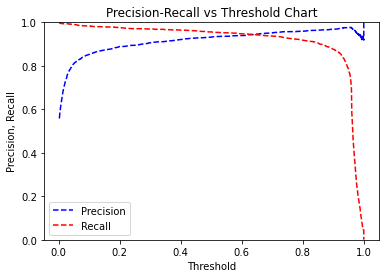

In [31]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [32]:
import pickle
#open a file, where you ant to store the data
file = open('svm.pklv2', 'wb')
# dump information to that file
pickle.dump(best_model, file)
file.close()